<a href="https://colab.research.google.com/github/Suleymanabdy/Data-Science-Checkpoints./blob/main/Support_vector_machines_checkpoint_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Loading dataset
data = pd.read_csv('/content/drive/MyDrive/Electric_cars_dataset.csv')



In [ ]:
#Displaying the first few rows of the dataset
data.head()

#Displaying general info about the dataset
data.info()

#Displaying summary statistics for numeric columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

ZIP Code    Model Year  Electric Range      Base MSRP  \
count  64347.000000  64346.000000    64353.000000   64353.000000   
mean   98143.452888   2018.186212      106.948985    2524.990754   
std     2856.064329      2.726742      104.093919   12402.895104   
min      745.000000   1993.000000        0.000000       0.000000   
25%    98052.000000   2017.000000       14.000000       0.000000   
50%    98121.000000   2018.000000       73.000000       0.000000   
75%    98370.000000   2021.000000      215.000000       0.000000   
max    99701.000000   2022.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  
count          64184.000000    6.435300e+04  
mean              29.951904    1.972905e+08  
std               14.661124    1.069466e+08  
min                0.000000    4.385000e+03  
25%               19.000000    1.372865e+08  
50%               34.000000    1.753776e+08  
75%               43.000000    2.299039e+08  
max               49.000000    4.789346e+08

In [ ]:
#Installing pandas profiling
!pip install ydata-profiling


In [ ]:
from ydata_profiling import ProfileReport

#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Electric_cars_dataset.csv')

#Creating a profiling report
profile = ProfileReport(df, title='Pandas Profiling Report')

#Saving the report to an HTML file
profile.to_file("/content/your_report.html")

#Displaying the report
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Checking for missing values
print(df.isnull().sum())

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

In [ ]:
#Checking for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

#Removing duplicates if they exist
data.drop_duplicates(inplace=True)

Number of duplicates: 0


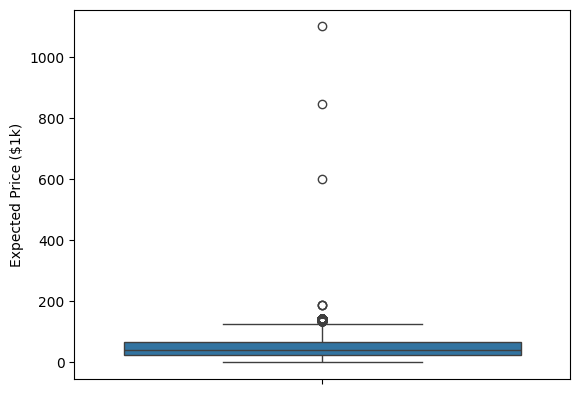

In [ ]:
#Converting 'Expected Price ($1k)' column to numeric, handling errors
data['Expected Price ($1k)'] = pd.to_numeric(data['Expected Price ($1k)'], errors='coerce')

#Droping rows with missing values in 'Expected Price ($1k)' after conversion
data.dropna(subset=['Expected Price ($1k)'], inplace=True)

#Visualizing outliers using boxplots
sns.boxplot(data['Expected Price ($1k)'])
plt.show()

#Removing outliers (example: using IQR)
Q1 = data['Expected Price ($1k)'].quantile(0.25)
Q3 = data['Expected Price ($1k)'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Expected Price ($1k)'] >= (Q1 - 1.5 * IQR)) & (data['Expected Price ($1k)'] <= (Q3 + 1.5 * IQR))]

In [ ]:
#One-hot encoding for categorical features
data = pd.get_dummies(data, columns=['County', 'City', 'Make', 'Model', 'Electric Vehicle Type'], drop_first=True)

In [ ]:
#Defining target variable and features
X = data.drop(columns=['Expected Price ($1k)', 'ID', 'VIN (1-10)', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility'])
y = data['Expected Price ($1k)']

In [ ]:


#Loading dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We only take the first two features for simplicity
y = iris.target

#Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Creating and train the SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
#Making predictions
y_pred = svm_model.predict(X_test)

In [ ]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 80.00%


In [ ]:
#Plotting decision boundary
def plot_decision_boundary(model, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(svm_model, X, y)

 Alternative Ways to Improve Model Performance                                                                   Feature Engineering: Create new features based on existing ones (e.g., interaction terms, polynomial features).
Hyperparameter Tuning: Use techniques like Grid Search or Random Search to find the best hyperparameters for the SVM model.
Scaling Features: Standardize or normalize the features to improve SVM performance.
Try Different Models: Experiment with other regression models like Random Forest, Gradient Boosting, or Neural Networks.
Cross-Validation: Use k-fold cross-validation to ensure the model's robustness and avoid overfitting.